In [2]:
from IPython.display import Video
from IPython.display import YouTubeVideo
import importlib as imp
import time
import pyautogui as pag

#.py file import
import trade_route as tr
import trade_def as td

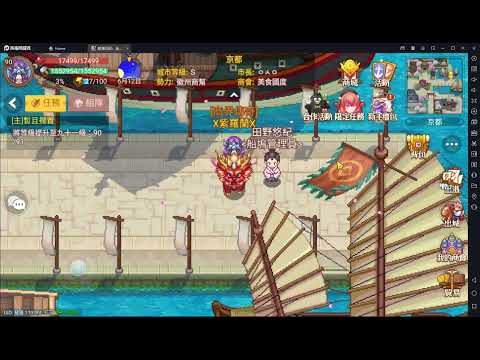

In [3]:
#練習紀錄影片(Youtube)
#影片連結1： https://youtu.be/lj4euTSBRYk
#影片連結2： https://youtu.be/nTLt2Pt87UU
YouTubeVideo('lj4euTSBRYk')

In [ ]:
'''
#商品1 Point(x=238, y=217)
#商品2 Point(x=521, y=210)
#商品3 Point(x=246, y=357)
#商品4 Point(x=508, y=361)
#商品5 Point(x=246, y=504)
#商品6 Point(x=542, y=504)
#商品7 Point(x=240, y=646)
#商品8 Point(x=527, y=646)

#黑市商品(辨識用座標)
商品1 Point(x=75, y=165) Point(x=355, y=260)
商品2 Point(x=365, y=165)
商品3 Point(x=75, y=275)
商品4 Point(x=365, y=275)
商品5 Point(x=75, y=385)
'''

In [10]:
#更新
Point(x=1344, y=208) #X
pag.position() #G
Point(x=798, y=601) #R
Point(x=786, y=734) #進入遊戲
Point(x=411, y=527) #腳色
pag.position() #start

#關閉遊戲
def shotDown():
    time.sleep(2)
    td.click_xy(1562,15,2)
    td.click_xy(871,522,2)

In [21]:
#滑鼠定位
pag.position()

Point(x=920, y=520)

In [ ]:
imp.reload(tr)
imp.reload(td)

#啟動循環跑商
#moneyNote = eval(input("紀錄目前存款"))
t = eval(input("跑商次數"))
time.sleep(5)

for i in range(t):
    time.sleep(3)
    
    time_start = time.time() #開始計時
    tr.runSA_JP()    #貿易路線1(東南亞+日本線(天津衛出發(758.9 s)))
    time_end = time.time() - time_start   #執行所花時間
    if i == 0:
        print('東南亞+日本線貿易時間:{:.1f}'.format(time_end), 's')
    
    time_start = time.time() #開始計時
    tr.runAF_EU()       #貿易路線2(歐非線(天津衛出發)(2069.4 s))
    time_end = time.time() - time_start   #執行所花時間
    if i == 0:
        print('歐非線貿易時間:{:.1f}'.format(time_end), 's')
    
    tr.AT()          #自動貿易(遊戲內建功能(755+13 s))
    print("TradingLoop finish {} times".format(i+1))
    if i < t-1:
        td.tradebook()   #貿易卷使用
        
#總路線耗時約 58mins 利潤 1350w

跑商次數7
東南亞+日本線貿易時間:757.7 s
歐非線貿易時間:2060.1 s
TradingLoop finish 1 times
TradingLoop finish 2 times
TradingLoop finish 3 times


In [22]:
imp.reload(tr)
imp.reload(td)

#啟動單趟跑商
time.sleep(5)

tr.runSA_JP()  #貿易路線1(東南亞+日本線(天津衛出發(758.5 s)))
tr.runAF_EU()     #貿易路線2(歐非線(天津衛出發)(1991.4 s))
tr.AT()        #自動貿易(遊戲內建功能(765 s))

In [24]:
imp.reload(tr)
imp.reload(td)

#測試區
time.sleep(3)
